In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

In [2]:
data = pd.read_csv("Crop_recommendation.csv")

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


## Performing eda(Exploratory Data Analysis )


In [5]:
data.shape

(2200, 8)

In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data.describe(include='all')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [11]:
data.rename(columns={'N':'nitrogen','P':'phosphorus','K':'potassium','label':'crops'},inplace=True)

In [12]:
#lr = LabelEncoder()
#data['crops'] = lr.fit_transform(data['crops'])


In [13]:
X = data.iloc[0: , 0:7]

In [14]:
X

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [15]:
y = data.iloc[0:, 7]

In [16]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: crops, Length: 2200, dtype: object

In [17]:
y.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## checking correlation of Data 

<AxesSubplot:>

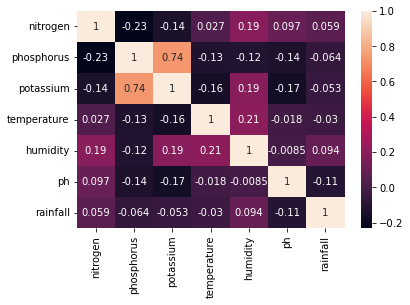

In [18]:
sns.heatmap(data.corr(),annot=True)   

## checking data distrubation of dependent to independent

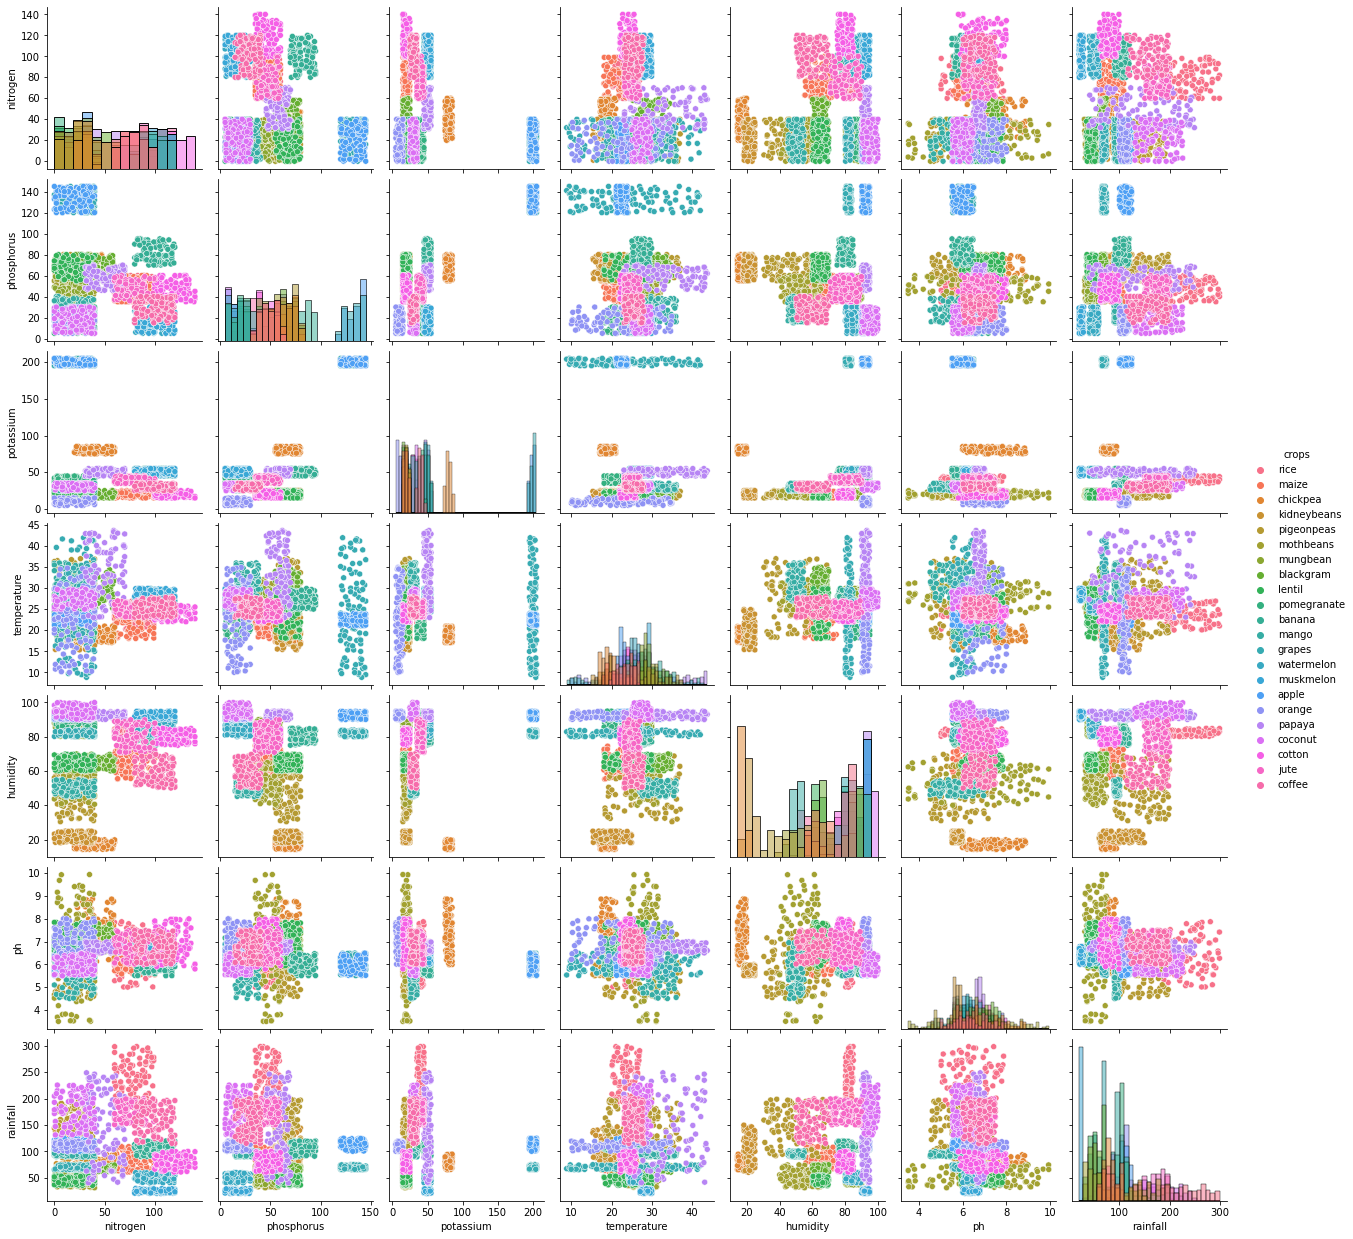

In [19]:
sns.pairplot(data,hue="crops",diag_kind="hist")

In [20]:
sd = StandardScaler()
sd_x = sd.fit_transform(X)


In [21]:
sd_x

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

## Splitting data into Traning and Testing 
   + Traning data = 0.70%
   + Testing data = 0.30%

In [22]:
X_train,X_test,y_train,y_test = train_test_split(sd_x,y,test_size=0.30,random_state=0)

In [23]:
X_train

array([[ 1.15007851,  0.07996974, -0.12143613, ...,  0.48268434,
         1.18031488,  1.66766185],
       [ 0.85204776, -0.86003991,  0.05630155, ...,  0.71847298,
        -0.51084256, -1.0073759 ],
       [-1.26126123, -1.43617485, -0.81263826, ...,  0.88216375,
         0.30940996,  0.1676226 ],
       ...,
       [-0.42135637,  0.32255287, -0.6546492 , ..., -0.35697127,
         0.03963093, -0.61762965],
       [-0.31298155,  0.35287576, -0.49666015, ..., -0.10583008,
         1.57216249, -1.13633283],
       [-0.99032418, -0.95100858, -0.773141  , ...,  0.8830661 ,
         0.09526414,  0.16462369]])

In [24]:
X_test

array([[ 1.47520297, -1.19359172,  0.03655292, ...,  0.728101  ,
        -0.06517235, -0.79728879],
       [ 1.0958911 , -1.2542375 , -0.04244161, ...,  0.62975693,
        -0.16224315, -1.00374129],
       [-0.99032418,  2.0509577 ,  3.05809364, ...,  0.55105864,
        -0.40166195, -0.52778362],
       ...,
       [-0.82776195,  2.08128059,  3.07784228, ...,  0.42147354,
         0.02312032, -0.69876065],
       [ 0.09342402,  0.41352154,  0.07605019, ...,  0.98049707,
         0.15072762,  0.68930464],
       [-0.28588785,  0.14061552,  0.53026873, ..., -2.54741082,
         0.90288253, -0.25213586]])

In [25]:
y_train

52             rice
1354     watermelon
1655         orange
360     kidneybeans
1609         orange
           ...     
1033         banana
1731         papaya
763       blackgram
835          lentil
1653         orange
Name: crops, Length: 1540, dtype: object

In [26]:
y_test

1320     watermelon
1367     watermelon
1291         grapes
264        chickpea
728       blackgram
           ...     
979     pomegranate
1689         orange
1239         grapes
1769         papaya
298        chickpea
Name: crops, Length: 660, dtype: object

## Model Fitting with Decision Tree

In [27]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

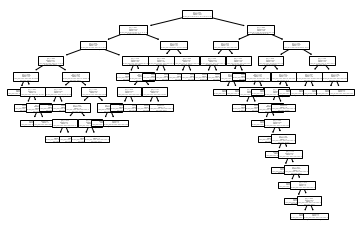

In [28]:
tree.plot_tree(dt_model);

In [29]:
y_train_pred = dt_model.predict(X_train)

In [30]:
y_train_pred_df = pd.DataFrame({'Actual': y_train , 'Predicted':y_train_pred})

In [31]:
y_train_pred_df

,Actual,Predicted
52,rice,rice
1354,watermelon,watermelon
1655,orange,orange
360,kidneybeans,kidneybeans
1609,orange,orange
...,...,...
1033,banana,banana
1731,papaya,papaya
763,blackgram,blackgram
835,lentil,lentil


In [32]:
confusion_matrix(y_train ,dt_model.predict(X_train))


array([[72,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 70,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 69,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 66,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 74,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 71,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 70,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 69,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 74,  0,  0,

In [33]:
accuracy_score(y_train , dt_model.predict(X_train))  ## Traning accuracy is 1.0

1.0

## Testing the data 

In [34]:
y_test_pred = dt_model.predict(X_test)

In [35]:
y_train_pred_df = pd.DataFrame({'Actual': y_test , 'Predicted':y_test_pred})

In [36]:
y_train_pred_df

,Actual,Predicted
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram
...,...,...
979,pomegranate,pomegranate
1689,orange,orange
1239,grapes,grapes
1769,papaya,papaya


In [37]:
confusion_matrix(y_test , dt_model.predict(X_test))

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,

In [38]:
Accuracy_test = accuracy_score(y_test , dt_model.predict(X_test))
print("DecisionTrees's Testing Accuracy is: ",Accuracy_test*100)


DecisionTrees's Testing Accuracy is:  98.03030303030303


## performing model fitting for KNN

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
knn_model_train_pred =  knn_model.predict(X_train)

In [41]:
knn_model_train_pred

array(['jute', 'watermelon', 'orange', ..., 'blackgram', 'lentil',
       'orange'], dtype=object)

In [42]:
y_train_pred_df = pd.DataFrame({'Actual': y_train , 'Predicted':knn_model_train_pred})

In [43]:
y_train_pred_df

,Actual,Predicted
52,rice,jute
1354,watermelon,watermelon
1655,orange,orange
360,kidneybeans,kidneybeans
1609,orange,orange
...,...,...
1033,banana,banana
1731,papaya,papaya
763,blackgram,blackgram
835,lentil,lentil


In [44]:
confusion_matrix(y_train ,knn_model.predict(X_train))

array([[72,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 70,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 68,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 66,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 74,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 69,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 70,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 68,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 74,  0,  0,

In [45]:
accuracy_train_KNN = accuracy_score(y_train ,knn_model.predict(X_train))
print("KNN Training Accuracy is: ",accuracy_train_KNN*100)

KNN Training Accuracy is:  98.57142857142858


##  model testing 

In [46]:
knn_model_test_pred = knn_model.predict(X_test)

In [47]:
y_test_pred_df = pd.DataFrame({'Actual': y_test , 'Predicted':knn_model_test_pred})

In [48]:
y_test_pred_df

,Actual,Predicted
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram
...,...,...
979,pomegranate,pomegranate
1689,orange,orange
1239,grapes,grapes
1769,papaya,papaya


In [49]:
confusion_matrix(y_test ,knn_model_test_pred )

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,

In [50]:
accuarcy_test_knn = accuracy_score(y_test ,knn_model_test_pred)
print(" KNN Testing Accuracy is: ",accuarcy_test_knn*100)

 KNN Testing Accuracy is:  98.03030303030303


## Checking k = 5 in knn 

In [51]:
knn_model_5 = KNeighborsClassifier(n_neighbors=5)
knn_model_5.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
knn_model_5_pred_train = knn_model_5.predict(X_train)

In [53]:
knn_model_5_pred_train_df = pd.DataFrame({'Actual': y_train , 'Predicted':knn_model_5_pred_train})

In [54]:

knn_model_5_pred_train_df

,Actual,Predicted
52,rice,jute
1354,watermelon,watermelon
1655,orange,orange
360,kidneybeans,kidneybeans
1609,orange,orange
...,...,...
1033,banana,banana
1731,papaya,papaya
763,blackgram,blackgram
835,lentil,lentil


In [55]:
confusion_matrix(y_train,knn_model_5_pred_train)

array([[72,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 70,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 68,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 66,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 74,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 70,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 70,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 67,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 74,  0,  0,

In [56]:
accuracy_score_knn_5 =accuracy_score(y_train , knn_model_5_pred_train)
print("Traning accuracy for knn_5 ",accuracy_score_knn_5 )

Traning accuracy for knn_5  0.9824675324675325


## testing model  for k = 5

In [57]:
knn_model_5_pred_test = knn_model_5.predict(X_test)

In [58]:
knn_model_5_pred_train_df = pd.DataFrame({'Actual': y_test , 'Predicted':knn_model_5_pred_test})

In [59]:
knn_model_5_pred_train_df

,Actual,Predicted
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram
...,...,...
979,pomegranate,pomegranate
1689,orange,orange
1239,grapes,grapes
1769,papaya,papaya


In [60]:
confusion_matrix(y_test ,knn_model_5_pred_test )

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,

In [61]:
accuracy_test_knn_5 = accuracy_score(y_test ,knn_model_5_pred_test )
print('Accuracy score for k = 5:-',accuracy_test_knn_5*100 )

Accuracy score for k = 5:- 97.57575757575758


## model fitting for Random Forest 

In [62]:
RF_model = RandomForestClassifier(n_estimators=100,criterion = 'entropy', max_depth = 5)
RF_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [63]:
rf_model_pred_train = RF_model.predict(X_train)

In [64]:
knn_model_5_pred_train_df = pd.DataFrame({'Actual': y_train , 'Predicted':rf_model_pred_train})

In [65]:
knn_model_5_pred_train_df

,Actual,Predicted
52,rice,jute
1354,watermelon,watermelon
1655,orange,orange
360,kidneybeans,kidneybeans
1609,orange,orange
...,...,...
1033,banana,banana
1731,papaya,papaya
763,blackgram,blackgram
835,lentil,lentil


In [66]:
confusion_matrix(y_train,knn_model_5_pred_train)

array([[72,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 70,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 68,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 66,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 74,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 70,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 70,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 67,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 74,  0,  0,

In [67]:
accuracy_score(y_train,knn_model_5_pred_train )

0.9824675324675325

## model testing

In [68]:
rf_model_pred_test = RF_model.predict(X_test)

In [69]:
knn_model_5_pred_test_df = pd.DataFrame({'Actual': y_test , 'Predicted':rf_model_pred_test})

In [70]:
knn_model_5_pred_test_df

,Actual,Predicted
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram
...,...,...
979,pomegranate,pomegranate
1689,orange,orange
1239,grapes,grapes
1769,papaya,papaya


In [71]:
confusion_matrix(y_test , rf_model_pred_test)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,

In [72]:
accuracy_score_rf_test = accuracy_score(y_test , rf_model_pred_test)
print('accuracy for RandomForest test data is :',accuracy_score_rf_test)

accuracy for RandomForest test data is : 0.9954545454545455


## giving own data for prediction 

In [73]:
data = pd.DataFrame([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
sc = StandardScaler()
sc_test = sc.fit_transform(data)

In [74]:
sc_test

array([[0., 0., 0., 0., 0., 0., 0.]])

In [75]:
dt_model.predict(sc_test)

array(['mango'], dtype=object)

In [76]:
RF_model.predict(sc_test)

array(['papaya'], dtype=object)

In [77]:
knn_model_5.predict(sc_test)

array(['maize'], dtype=object)

In [78]:
knn_model.predict(sc_test)

array(['maize'], dtype=object)